In [3]:
from collect_data import *
from collect_metrics import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df_stft = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_.csv')
df_clip = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_text_clip_.csv')
df_gpt = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_text_gpt_.csv')
df_w2v = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_w2v_.csv')

In [165]:
null_distr_clip = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_ridge_text_clip_.npy')
null_distr_stft = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_ridge_.npy')
null_distr_gpt = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_ridge_text_gpt_.npy')
null_distr_w2v = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_ridge_w2v_.npy')


## Topomaps Z score

In [182]:
null_distr_clip_mean = np.mean(null_distr_clip, 0)
null_distr_stft_mean = np.mean(null_distr_stft[0:-1], 0)
null_distr_gpt_mean = np.mean(null_distr_gpt, 0)
null_distr_w2v_mean = np.mean(null_distr_w2v[0:-1], 0)

In [166]:
null_distr_w2v_mean.shape

(208, 30)

In [167]:
def get_mean_from_subjects_metrics(df, column, band):
    values_to_mean = []
    filtered_df = df[df['Band'] == band]
    
    for subject in filtered_df['Subject'].unique():
        subject_df = filtered_df[filtered_df['Subject'] == subject]
        get_values = torch.Tensor(subject_df[column].values)
        values_to_mean.append(get_values)
    
    mean_channels = torch.mean(torch.stack(values_to_mean), dim=0)
    return mean_channels




In [168]:
mean_r2_complete_subj_stft = get_mean_from_subjects_metrics(df_stft, "modified_r2", "complete")
mean_r2_complete_subj_w2v = get_mean_from_subjects_metrics(df_w2v, "modified_r2", "complete")
mean_r2_complete_subj_clip = get_mean_from_subjects_metrics(df_clip, "modified_r2", "complete")
mean_r2_complete_subj_gpt = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "complete")


In [169]:
print('COMPLETE_MEAN: ', "{:.7f}".format(mean_r2_complete_subj_clip.mean()))
print('COMPLETE_STD: ', "{:.7f}".format(mean_r2_complete_subj_clip.std()))

COMPLETE_MEAN:  0.0001874
COMPLETE_STD:  0.0003188


In [170]:
mean_r2_complete_subj_stft.shape

torch.Size([208])

In [171]:
from scipy.stats import ttest_ind, ttest_1samp

z_models = []
pval_models = []
null_distr_model = [null_distr_stft_mean, null_distr_w2v_mean, null_distr_clip_mean, null_distr_gpt_mean]
df_model_complete_subj = [mean_r2_complete_subj_stft, mean_r2_complete_subj_w2v, mean_r2_complete_subj_clip, mean_r2_complete_subj_gpt]
for mod in range(num_models):
    z = []
    pval = []
    for i in range(num_channel):

        media = null_distr_model[mod][i,:].mean()
        devstd = null_distr_model[mod][i,:].std()

        t_st, p = ttest_1samp(null_distr_model[mod][i,:], df_model_complete_subj[mod][i])
        t = float((df_model_complete_subj[mod][i] - media)/devstd)
        z.append(t)
        pval.append(p)
    z_models.append(z)
    pval_models.append(pval)



In [172]:
choose_model = 2

print('-------- Z SCORE ---------')
print(np.min(z_models[choose_model]))
print(np.max(z_models[choose_model]))
print('-----------------')
print(np.mean(z_models[choose_model]))    
print(np.std(z_models[choose_model]))

print('-------- P VALUE ---------')
print(np.min(pval_models[choose_model]))
print(np.max(pval_models[choose_model]))
print('-----------------')
print(np.mean(pval_models[choose_model]))    
print(np.std(pval_models[choose_model]))

-------- Z SCORE ---------
-4.782891273498535
25.3662109375
-----------------
7.892955515139665
5.777195453017361
-------- P VALUE ---------
2.7171966305320945e-42
0.9244112947780481
-----------------
0.004833397773649279
0.06408540350625785


Reading 0 ... 395999  =      0.000 ...   395.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:51: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


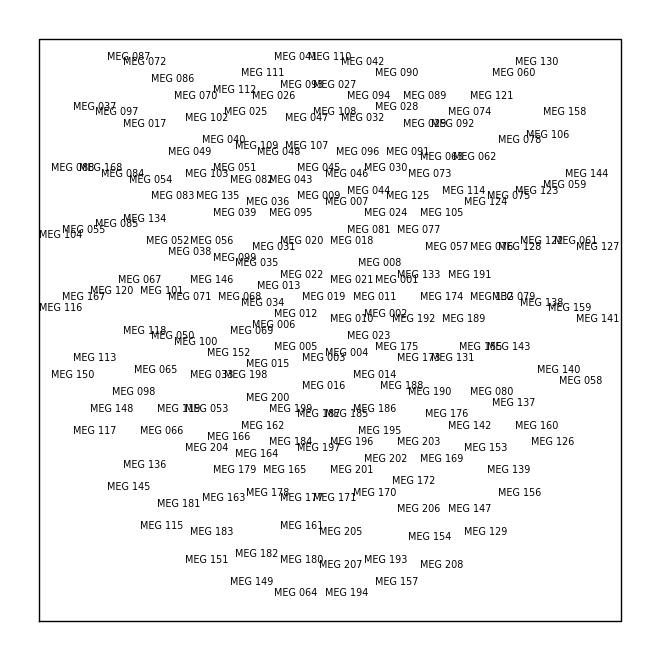

Figure(640x640)


In [173]:
raw = get_bids_raw(meg_path, patient[0], session[0], '0')
layout_from_raw = mne.channels.find_layout(raw.info, ch_type='mag')
print(layout_from_raw.plot())

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


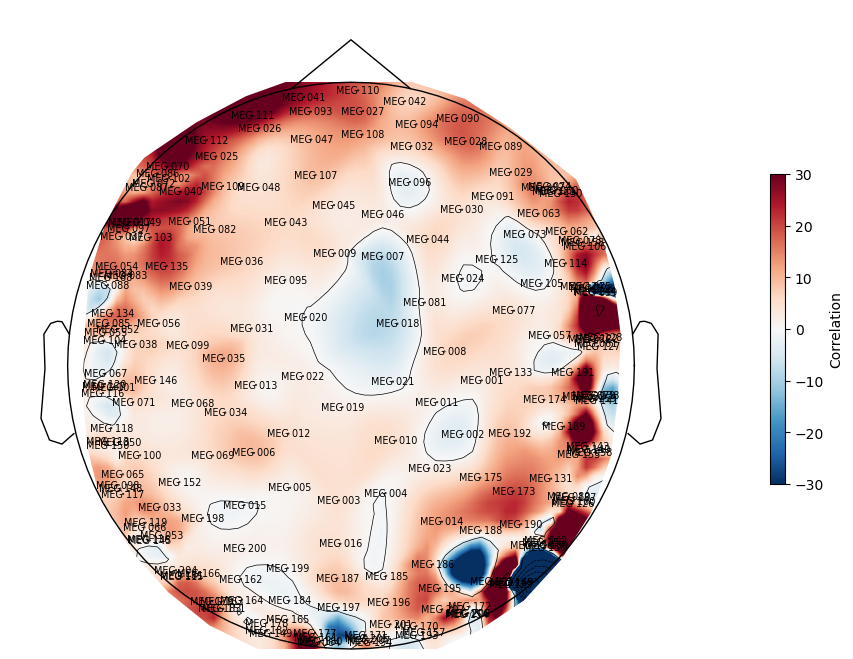

In [177]:
get_topomap(raw, z_models[3], (-30, 30)) 

## Violinplot

In [185]:
null_distr_clip_mean = np.mean(null_distr_clip, 1)
null_distr_stft_mean = np.mean(null_distr_stft[0:-1], 1)
null_distr_gpt_mean = np.mean(null_distr_gpt, 1)
null_distr_w2v_mean = np.mean(null_distr_w2v[0:-1], 1)


def get_mean_from_channels_metrics(df, column, band):
    values_to_mean = []
    filtered_df = df[df['Band'] == band]

    for channel in filtered_df['Channel'].unique():
        subject_df = filtered_df[filtered_df['Channel'] == channel]
        get_values = torch.Tensor(subject_df[column].values)
        values_to_mean.append(get_values)
    
    mean_channels = torch.mean(torch.stack(values_to_mean), dim=0)
    return mean_channels


mean_r2_complete_chann_stft = get_mean_from_channels_metrics(df_stft, "modified_r2", "complete")
mean_r2_complete_chann_w2v = get_mean_from_channels_metrics(df_w2v, "modified_r2", "complete")
mean_r2_complete_chann_clip = get_mean_from_channels_metrics(df_clip, "modified_r2", "complete")
mean_r2_complete_chann_gpt = get_mean_from_channels_metrics(df_gpt, "modified_r2", "complete")



In [186]:
null_distr_gpt_mean.shape

(8, 30)

In [187]:
null_distr_clip_mean_sub = np.mean(null_distr_clip_mean, 0)
null_distr_stft_mean_sub = np.mean(null_distr_stft_mean, 0)
null_distr_gpt_mean_sub = np.mean(null_distr_gpt_mean, 0)
null_distr_w2v_mean_sub = np.mean(null_distr_w2v_mean, 0)

baseline_list = [null_distr_clip_mean_sub, null_distr_stft_mean_sub, null_distr_gpt_mean_sub, 
                    null_distr_w2v_mean_sub]

baseline_dist = []
for mod in range(num_models):
    baseline_mod = []
    for i in range(30):

        media = baseline_list[mod].mean()
        devstd = baseline_list[mod].std()
        t = float((baseline_list[mod][i] - media)/devstd)
        baseline_mod.append(t)
    baseline_dist.append(baseline_mod)

In [188]:
z_models = []
pval_models = []
null_distr_model = [null_distr_stft_mean, null_distr_w2v_mean, null_distr_clip_mean, null_distr_gpt_mean]
df_model_complete_chann = [mean_r2_complete_chann_stft, mean_r2_complete_chann_w2v, mean_r2_complete_chann_clip, mean_r2_complete_chann_gpt]
for mod in range(num_models):
    z = []
    pval = []
    for i in range(act_subjects):

        media = null_distr_model[mod][i,:].mean()
        devstd = null_distr_model[mod][i,:].std()

        t_st, p = ttest_1samp(null_distr_model[mod][i,:], df_model_complete_chann[mod][i])
        t = float((df_model_complete_chann[mod][i] - media)/devstd)
        z.append(t)
        pval.append(p)
    z_models.append(z)
    pval_models.append(pval)

In [189]:
choose_model = 2

print('-------- Z SCORE ---------')
print(np.min(z_models[choose_model]))
print(np.max(z_models[choose_model]))
print('-----------------')
print(np.mean(z_models[choose_model]))    
print(np.std(z_models[choose_model]))

print('-------- P VALUE ---------')
print(np.min(pval_models[choose_model]))
print(np.max(pval_models[choose_model]))
print('-----------------')
print(np.mean(pval_models[choose_model]))    
print(np.std(pval_models[choose_model]))

-------- Z SCORE ---------
-9.640617370605469
29.6765079498291
-----------------
11.264275953173637
12.968820548158941
-------- P VALUE ---------
2.8847681607131723e-44
2.9431814766551097e-10
-----------------
3.678976845820129e-11
9.733657813201124e-11


In [192]:
z_models[2]

[5.654048442840576,
 5.3091959953308105,
 -9.640617370605469,
 29.6765079498291,
 15.215934753417969,
 27.864763259887695,
 17.77118682861328,
 -1.7368122339248657]

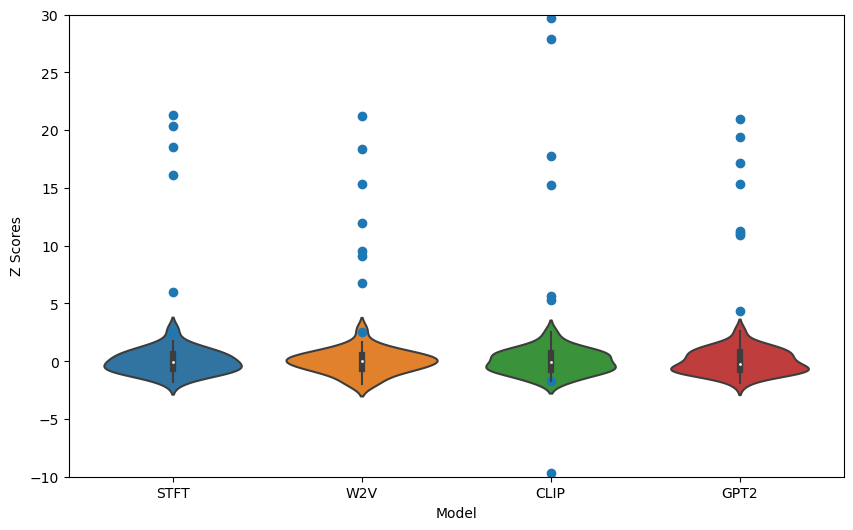

In [203]:
model_list = ['STFT', 'W2V', 'CLIP', 'GPT2']
all_null_distr = [val for sublist in baseline_dist for val in sublist]   
source_models = []
for i, sublist in enumerate(baseline_dist):
    source_models.extend([model_list[i]] * len(sublist))
data_zscore = {"Null Distr": all_null_distr, "Model": source_models}
df_zscore = pd.DataFrame(data_zscore)

x_offsets = np.arange(len(model_list))
x_offsets_rep = np.repeat(x_offsets, 8)
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) 
sns.violinplot(x="Model", y="Null Distr", data=df_zscore, ax=ax)
ax.scatter(x_offsets_rep, z_models)
# plt.title("Null distribution for each model")
plt.xlabel("Model")
plt.ylabel("Z Scores")
plt.ylim(-10, 30)
plt.show()

In [163]:
ax.__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <AxesSubplot:title={'center':'Null distribution for each model'}, xlabel='Model', ylabel='Null Values'>,
 'figure': <Figure size 1000x600 with 1 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_contains': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7f3f91e8bb20>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 1000x600 with 1 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_originalPosition': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]),
 '_aspect': '